Epoch 1/5
2/2 [==============================] - 1s 11ms/step - loss: 0.6909 - accuracy: 0.4706
Epoch 2/5
2/2 [==============================] - 0s 9ms/step - loss: 0.6067 - accuracy: 0.8824
Epoch 3/5
2/2 [==============================] - 0s 9ms/step - loss: 0.5299 - accuracy: 0.9706
Epoch 4/5
2/2 [==============================] - 0s 10ms/step - loss: 0.4816 - accuracy: 0.8824
Epoch 5/5
2/2 [==============================] - 0s 10ms/step - loss: 0.4171 - accuracy: 0.8529


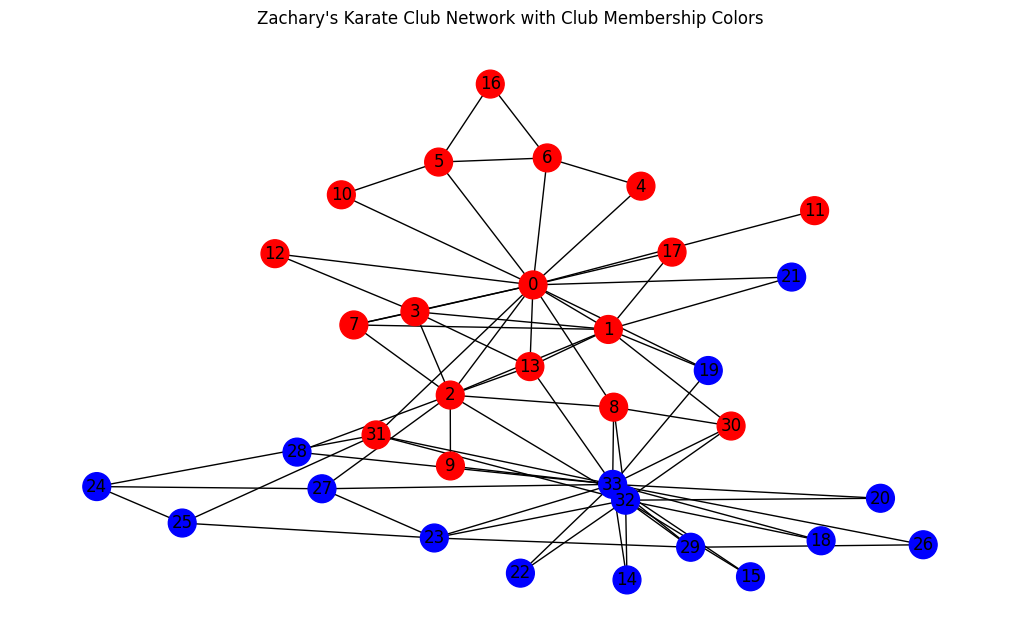

In [38]:
import numpy as np
import tensorflow as tf
import networkx as nx
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Create Zachary's Karate Club graph manually
edges = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10),
         (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2),
         (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3),
         (2, 32), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32),
         (3, 7), (3, 12), (3, 13), (4, 6), (5, 6), (5, 10), (5, 16), (6, 16),
         (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33),
         (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33),
         (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33),
         (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33),
         (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33),
         (32, 33)]

G = nx.Graph()
G.add_edges_from(edges)

# Convert the graph to TensorFlow-compatible data
x = np.eye(len(G.nodes()))  # Identity matrix as node features
adj = nx.to_numpy_array(G)

# Get the target labels (club membership) and convert to integers
club_labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Define the Graph Neural Network model
def GNNModel(input_dim, hidden_dim, output_dim):
    x_input = Input(shape=(input_dim,))
    adj_input = Input(shape=(input_dim, input_dim))

    hidden = Dense(hidden_dim, activation='relu')(x_input)
    hidden = Dense(hidden_dim, activation='relu')(hidden)
    output = Dense(output_dim, activation='softmax')(hidden)

    model = Model(inputs=[x_input, adj_input], outputs=output)
    return model

# Define the GNN model
input_dim = x.shape[1]
hidden_dim = 64
output_dim = 2  # Two classes: Club 0 and Club 1
model = GNNModel(input_dim, hidden_dim, output_dim)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss=SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Training the GNN model
num_epochs = 5
history = model.fit([x, adj], np.array(club_labels), batch_size=32, epochs=num_epochs)

# Visualization: Plotting the graph with club membership colors
color_map = {0: 'red', 1: 'blue'}
node_colors = [color_map[label] for label in club_labels]

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_color=node_colors, node_size=400, with_labels=True)
plt.title("Zachary's Karate Club Network with Club Membership Colors")
plt.show()